Questo notebook analizza e confronta i risultati delle due implementazioni in MATLAB della decompsizione di Cholesky

La prima fa uso del metodo *chol()*, restituendo la decomposizione, su cui va poi calcolato il sistema lineare, attraverso permutazione delle righe della matrice

La seconda utilizza direttamente la funzione backslash (\\) di MATLAB, che fa uso dietro le quinte della decomposizione di CHolesky se si rende conto che la matrice in input è SDP

Il confronto è stato fatto confrontando le due implementazioni (chol vs \\) su entrambi gli OS 

Non aveva senso confrontare la stessa implementazione (chol vs chol) e (\\ vs \\) sui due diversi OS, in quanto i risulati erano molto simili tra loro, e l'analisi dettagliata per il confronto tra i sistemi operativi è stata già vista nelle analisi MATLAB vs Python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os

import sklearn
from sklearn.cluster import KMeans

In [11]:
X_LABEL = "X_LABEL"
Y_LABEL = "Y_LABEL"
LOG_SCALE = "LOG_SCALE"

def get_data_sorted(name, data):
    """
    Takes the dataset and the name of column on which it sorts
    return python, matlab dataset
    """
    data = data.sort_values(by=[name])  # sort sulle dimensioni delle matrici in ordine crescente
    data_windows = data.loc[data['OS'] == 0]
    data_linux = data.loc[data['OS'] == 1]
    return data_windows, data_linux


def read_data(name):
    from Analysis.resources.costants import RESOURCES_DIRECTORY
    path = os.path.join(RESOURCES_DIRECTORY, name)
    return pd.read_csv(path)


def write_data(df, name):
    from Analysis.resources.costants import RESOURCES_DIRECTORY
    path = os.path.join(RESOURCES_DIRECTORY, name)
    df.to_csv(path, index=False)

def plot(labels, data_py, data_matlab, x_name, y_name, title, **keywords):

    figure(figsize=(20, 6), dpi=80)
    title = title + " " + "(Line Plot)"

    plt.plot(labels, data_py, label="chol", linestyle="-")
    plt.plot(labels, data_matlab, label="backslash", linestyle="--")
    show(x_name, y_name, title, **keywords)


def bar_plot(labels, data_py, data_matlab, x_name, y_name, title, **keywords):
    figure(figsize=(20, 6), dpi=80)
    title = title + " " + "(Bar Plot)"

    x_axis = np.arange(len(labels))

    # Multi bar Chart

    plt.bar(x_axis -0.2, data_py, width=0.4, label = "chol")
    plt.bar(x_axis +0.2, data_matlab, width=0.4, label = "backslash")

    # Xticks

    plt.xticks(x_axis, labels)
    show(x_name, y_name, title, **keywords)



def show(x_name, y_name, title, **keywords):

    x_label, y_label = "", ""
    if X_LABEL in keywords.keys():
        x_label = f"({keywords[X_LABEL]})"
    if Y_LABEL in keywords.keys():
        y_label = f"({keywords[Y_LABEL]})"
    if LOG_SCALE in keywords.keys():
        plt.yscale('log') # logarithmic scale

    plt.xlabel(f"{x_name} {x_label}",  labelpad=15, fontsize=12, color="#333533")
    plt.ylabel(f"{y_name} {y_label}",  labelpad=15, fontsize=12, color="#333533")
    plt.title(title, fontsize=18, color="#333533", pad=35)

    # removing axes from the figure
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend(loc='upper center',ncol=2,frameon=False)
    plt.show()


def correlation(x, y, x_name, y_name):
    figure(figsize=(20, 6), dpi=80)
    title = f"Scatter-plot variables '{x_name}' and '{y_name}'"
    my_rho = np.corrcoef(x, y) # Correlation Coefficient
    print(my_rho)

    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(x, y)
    plt.plot(x, y, color = "g")
    show(x_name, y_name, title)

In [20]:
# Data Loading

data = pd.read_csv("data.csv")
data_chol = data[(data.Language == 0)]      # just MATLAB data
data_chol_win, data_chol_lin = get_data_sorted("Rows", data_chol)

data_backslash = pd.read_csv("dataBackslash.csv")
data_backslash_win, data_backslash_lin = get_data_sorted("Rows", data_backslash)

matrix_names = data_chol_win.Name.tolist()

# Error

Valori di errore praticamente uguali, differenze minime ed impercettibili (per entrambi gli OS)

## Windows

List of errors:
 [6.3482e-07, 1.1359e-13, 2.6728e-16, 3.3486e-13, 1.05e-12, 4.3889e-11, 3.5766e-12] 
 [6.4506e-07, 1.0421e-13, 2.3778e-16, 3.6873e-13, 1.0499e-12, 4.3888e-11, 3.5769e-12]


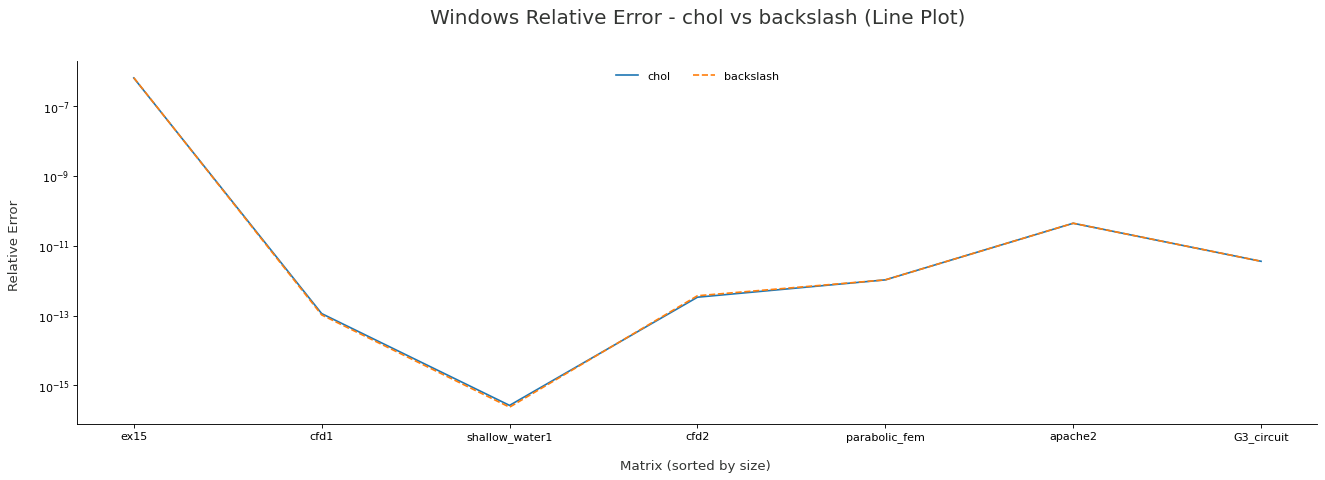

In [36]:
print("List of errors:\n", data_chol_win["Error"].to_list(), "\n", data_backslash_win["Error"].to_list())
plot(matrix_names, data_chol_win["Error"], data_backslash_win["Error"], "Matrix (sorted by size)", "Relative Error", "Windows Relative Error - chol vs backslash", LOG_SCALE=True)

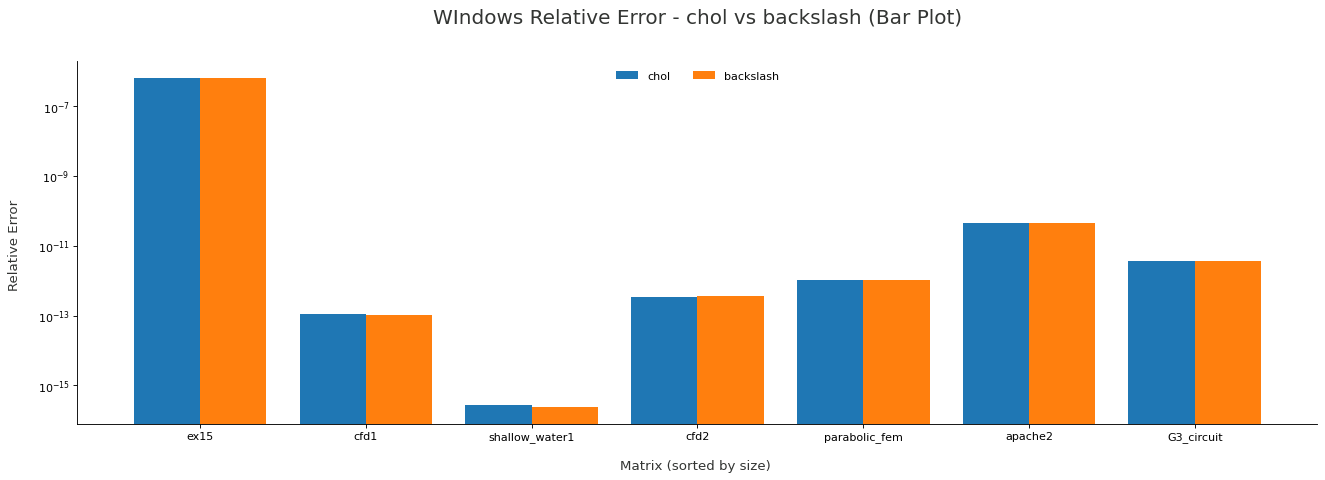

In [37]:
bar_plot(matrix_names, data_chol_win["Error"], data_backslash_win["Error"], "Matrix (sorted by size)", "Relative Error", "WIndows Relative Error - chol vs backslash", LOG_SCALE=True)

## Linux

List of errors:
 [6.3482e-07, 1.1359e-13, 2.6728e-16, 3.3486e-13, 1.05e-12, 4.3889e-11, 3.5766e-12] 
 [6.4506e-07, 1.0421e-13, 2.3778e-16, 3.6873e-13, 1.0499e-12, 4.3888e-11, 3.5769e-12]


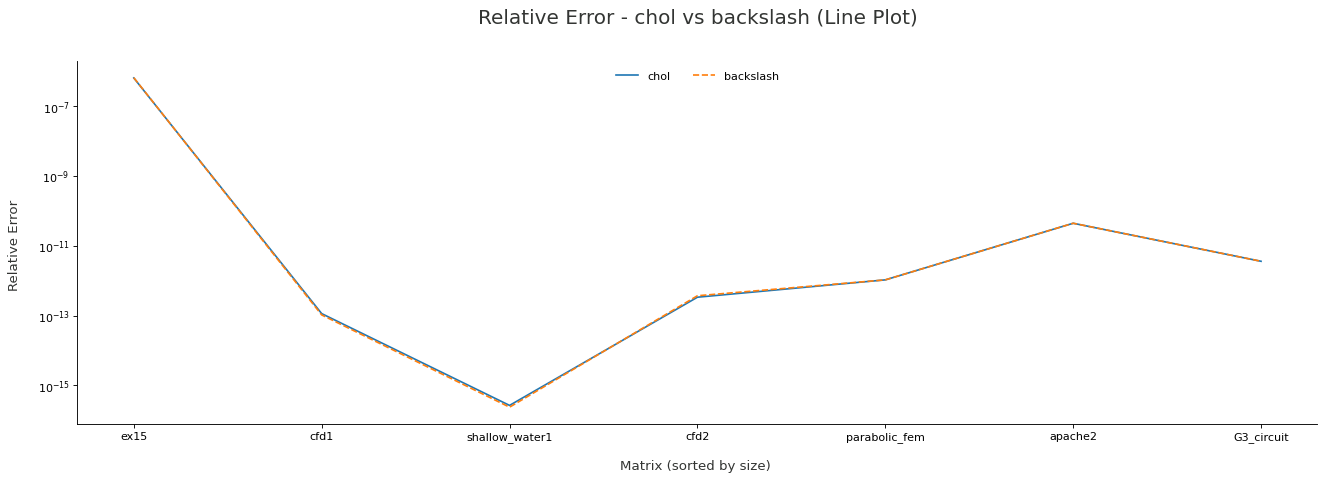

In [30]:
print("List of errors:\n", data_chol_lin["Error"].to_list(), "\n", data_backslash_lin["Error"].to_list())
plot(matrix_names, data_chol_lin["Error"], data_backslash_lin["Error"], "Matrix (sorted by size)", "Relative Error", "Linux Relative Error - chol vs backslash", LOG_SCALE=True)

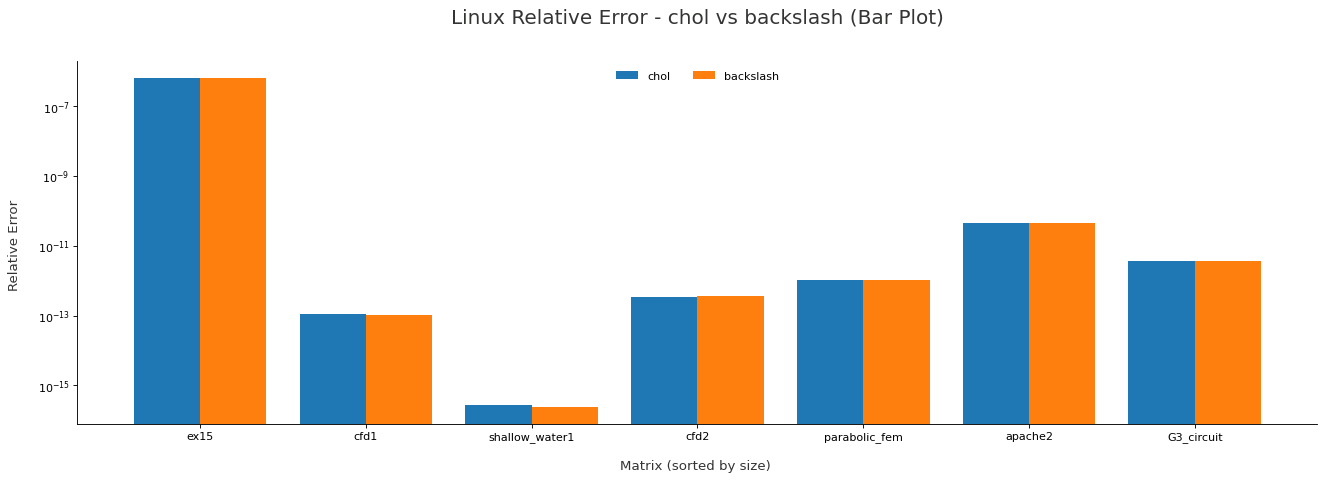

In [31]:
bar_plot(matrix_names, data_chol_lin["Error"], data_backslash_lin["Error"], "Matrix (sorted by size)", "Relative Error", "Linux Relative Error - chol vs backslash", LOG_SCALE=True)

# Memory

Backslah funziona nettamente meglio, il che è dovuto al fatto che probabilmente effettua delle operazioni particolari sulla matrice di decomposizione che ottimizzano l'utilizzo della memoria

## Windows

List of memory usage:
 [3.6168, 577.5852, 41.5662, 1187.7089, 607.6006, 2877.0181, 3262.5295] 
 [0.65536, 2.8467, 1.0527, 4.4196, 13.3775, 23.167, 133.4231]


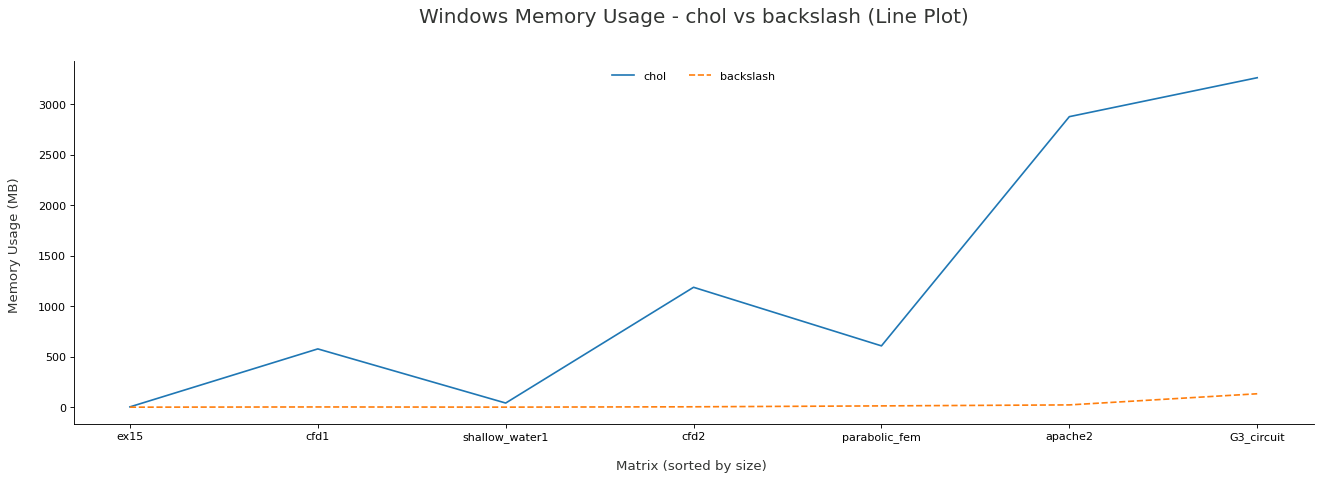

In [34]:
print("List of memory usage:\n", data_chol_win["Memory"].to_list(), "\n", data_backslash_win["Memory"].to_list())
plot(matrix_names, data_chol_win["Memory"], data_backslash_win["Memory"], "Matrix (sorted by size)", "Memory Usage (MB)", "Windows Memory Usage - chol vs backslash")

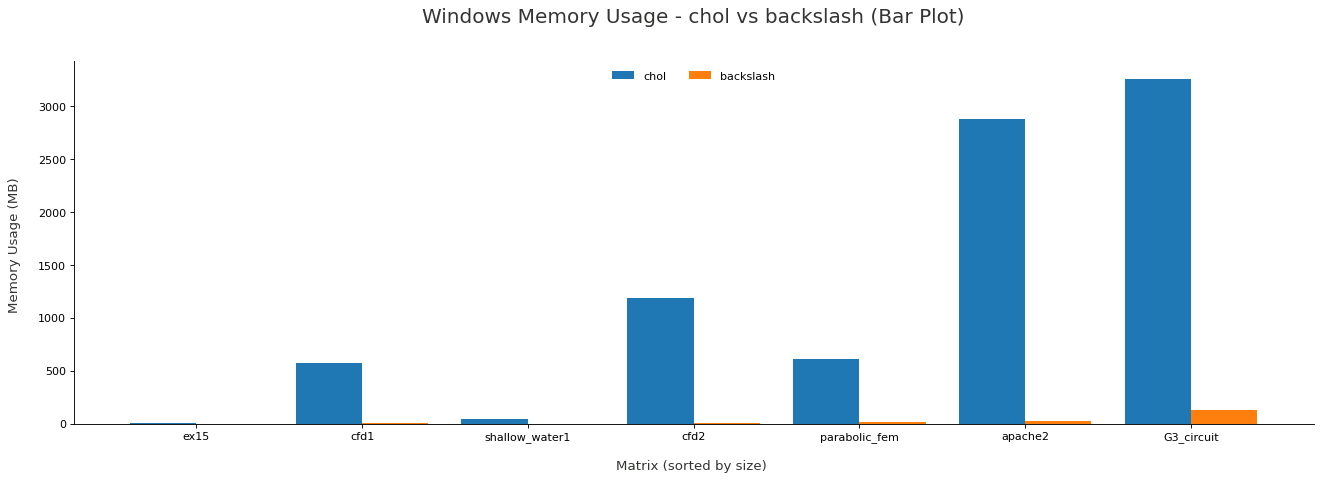

In [35]:
bar_plot(matrix_names, data_chol_win["Memory"], data_backslash_win["Memory"], "Matrix (sorted by size)", "Memory Usage (MB)", "Windows Memory Usage - chol vs backslash")

## Linux

List of memory usage:
 [0.0, 560.592, 0.0, 1145.468, 538.452, 2769.992, 3203.66] 
 [0.0, 29.064, 0.0, 19.14, -48.212, 0.0, 289.98]


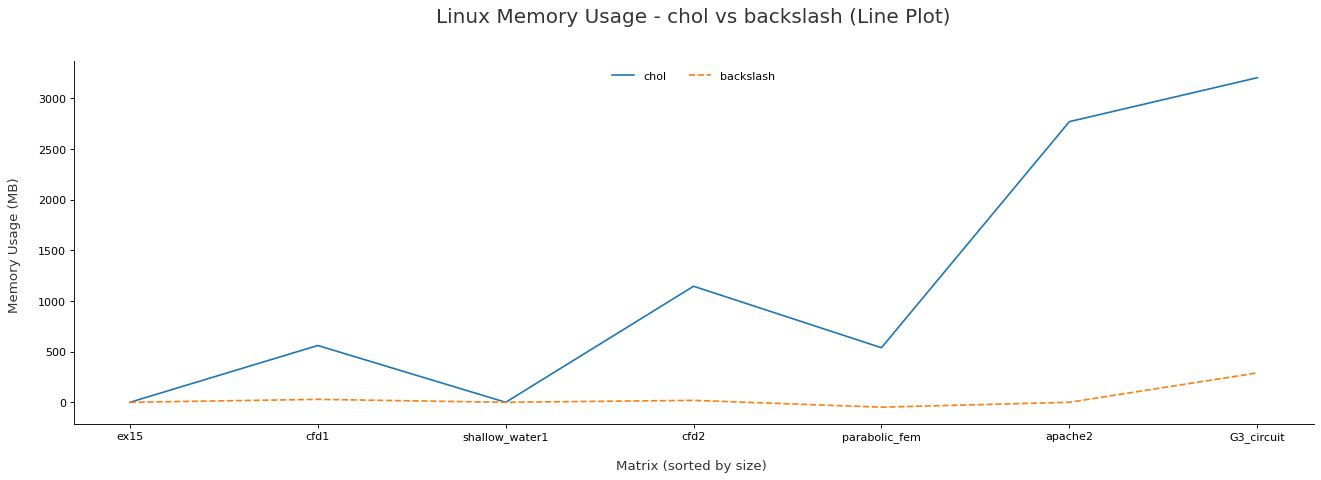

In [38]:
print("List of memory usage:\n", data_chol_lin["Memory"].to_list(), "\n", data_backslash_lin["Memory"].to_list())
plot(matrix_names, data_chol_lin["Memory"], data_backslash_lin["Memory"], "Matrix (sorted by size)", "Memory Usage (MB)", "Linux Memory Usage - chol vs backslash")

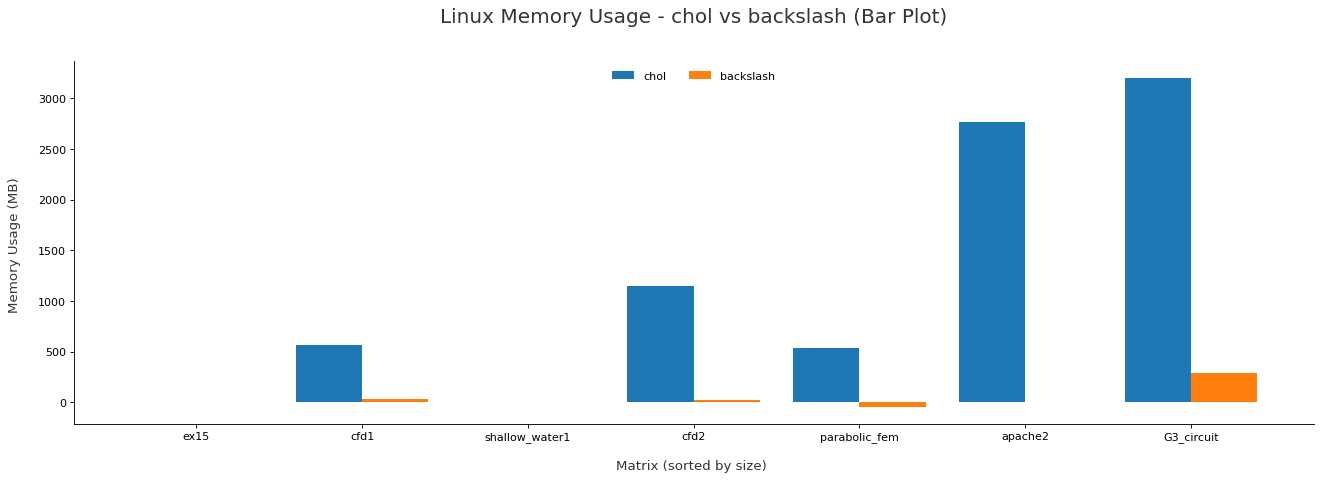

In [39]:
bar_plot(matrix_names, data_chol_lin["Memory"], data_backslash_lin["Memory"], "Matrix (sorted by size)", "Memory Usage (MB)", "Linux Memory Usage - chol vs backslash")

# Time


Backslah funziona nettamente meglio, il che è dovuto al fatto che probabilmente effettua delle operazioni particolari sulla matrice di decomposizione che ottimizzano il tempo di esecuzione

## Windows

List of time elapsed:
 [0.030822, 2.5576, 0.25437, 6.0834, 3.0333, 13.4307, 19.5037] 
 [0.012636, 0.8906, 0.1585, 2.0257, 1.6267, 5.5123, 8.2539]


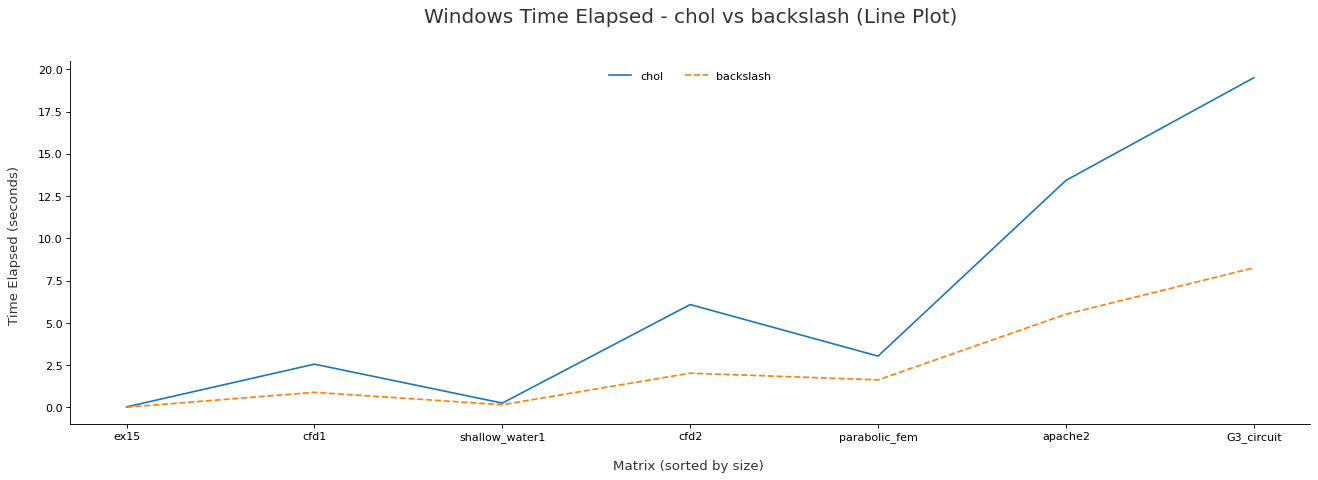

In [40]:
print("List of time elapsed:\n", data_chol_win["Time"].to_list(), "\n", data_backslash_win["Time"].to_list())
plot(matrix_names, data_chol_win["Time"], data_backslash_win["Time"], "Matrix (sorted by size)", "Time Elapsed (seconds)", "Windows Time Elapsed - chol vs backslash")

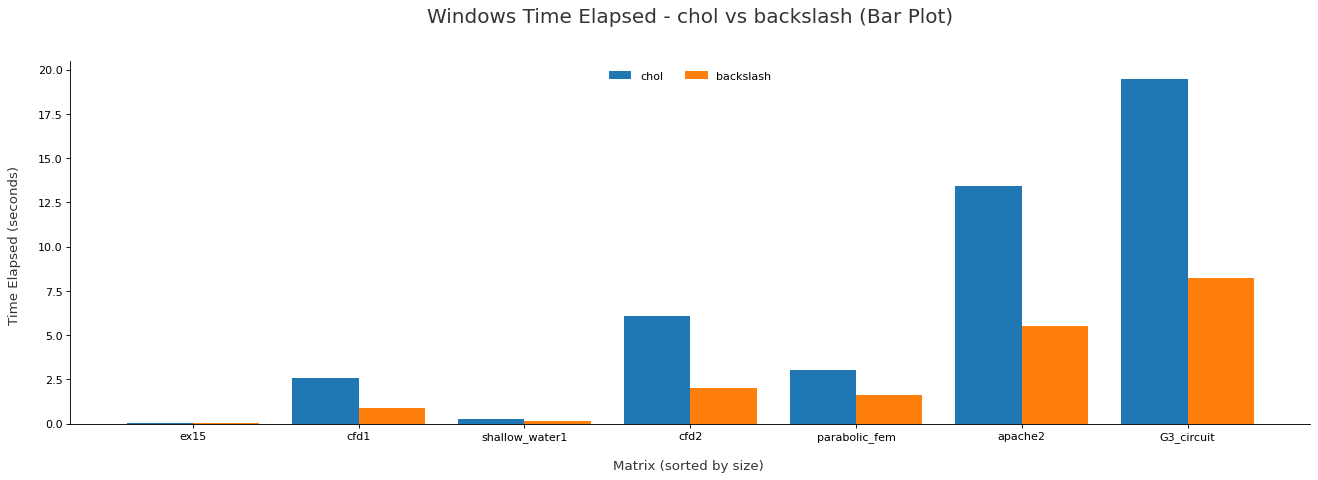

In [41]:
bar_plot(matrix_names, data_chol_win["Time"], data_backslash_win["Time"], "Matrix (sorted by size)", "Time Elapsed (seconds)", "Windows Time Elapsed - chol vs backslash")

## Linux

List of time elapsed:
 [0.024699, 2.7237, 0.26305, 6.2418, 3.2869, 15.1453, 18.8832] 
 [0.013287, 0.94752, 0.15534, 2.2002, 1.766, 5.9138, 8.7995]


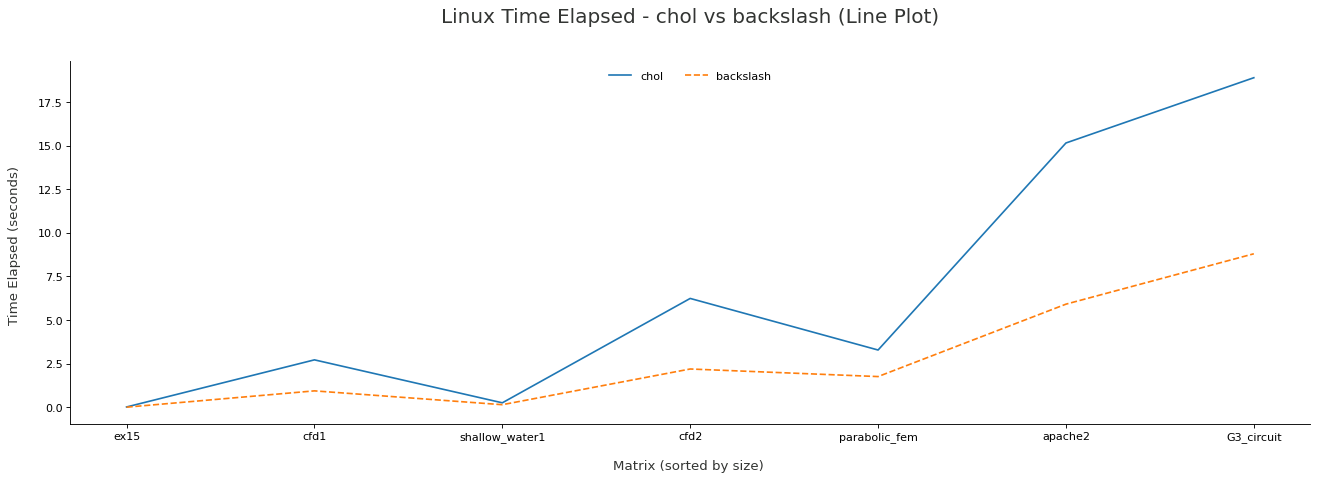

In [42]:
print("List of time elapsed:\n", data_chol_lin["Time"].to_list(), "\n", data_backslash_lin["Time"].to_list())
plot(matrix_names, data_chol_lin["Time"], data_backslash_lin["Time"], "Matrix (sorted by size)", "Time Elapsed (seconds)", "Linux Time Elapsed - chol vs backslash")

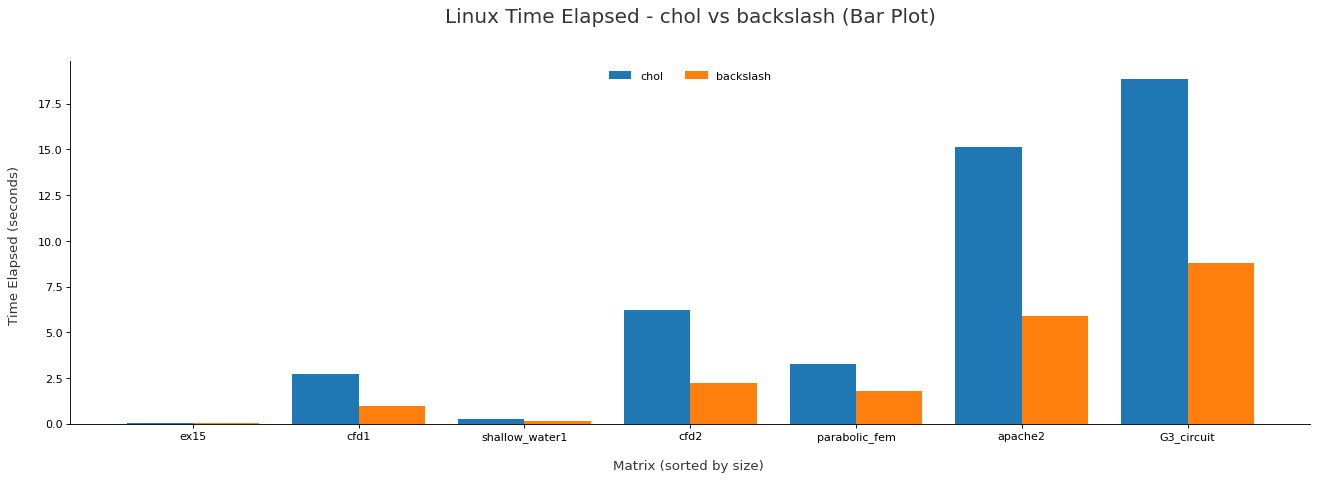

In [43]:
bar_plot(matrix_names, data_chol_lin["Time"], data_backslash_lin["Time"], "Matrix (sorted by size)", "Time Elapsed (seconds)", "Linux Time Elapsed - chol vs backslash")